In [1]:
import os, sys
root_path = os.path.abspath('.').split('jupyters')[0]
sys.path.append(root_path)

import json
import argparse
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from data_loader import load_data
from models.cnn_geo import CNN_geo
from models.modules import Feature_Extractor, Correlation_network, Spatial_transformer_regressor

from utils import image, visualize
import geo_transform as tps
from train_CNNgeo import train_debug as train

In [2]:
with open('../overfit.json') as fp:
    config = json.load(fp)

config['backbone'] = 'prototypical_network' #vgg16
config['train']['learning_rate'] = 1E-5
config['train']['n_examples'] = 1
config['train']['batch_size'] = 1
config['train']['epochs'] = 200
    
print("backbone : ", config['backbone'])
print("n_examples : ", config['train']['n_examples'])
print("learning_rate : ", config['train']['learning_rate'])
print("batch_size : ", config['train']['batch_size'])
print("epoch num : ", config['train']['epochs'])

backbone :  prototypical_network
n_examples :  1
learning_rate :  1e-05
batch_size :  1
epoch num :  200


In [3]:
np.set_printoptions(formatter = {"float_kind" : lambda x : "{0:0.4f}".format(x)} )
#np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

# Training

In [4]:
model, x, y_loss, y_score_std = train(config, tentative_penalty=False)

train dataset amount : 1
Epoch 1, Loss: 2.9458861351013184, score std 0.04447302967309952
Epoch 2, Loss: 2.197054147720337, score std 0.04330713301897049
Epoch 3, Loss: 1.7029342651367188, score std 0.04484615474939346
Epoch 4, Loss: 1.271328091621399, score std 0.04653673246502876
Epoch 5, Loss: 1.3418318033218384, score std 0.04912222921848297
Epoch 6, Loss: 1.2925277948379517, score std 0.04665833339095116
Epoch 7, Loss: 0.9984910488128662, score std 0.046880025416612625
Epoch 8, Loss: 1.0749166011810303, score std 0.04687300696969032
Epoch 9, Loss: 0.9223036170005798, score std 0.04572072997689247
Epoch 10, Loss: 0.691210925579071, score std 0.04816297069191933
Epoch 11, Loss: 0.9045432209968567, score std 0.04732557758688927
Epoch 12, Loss: 0.8939417004585266, score std 0.04964570701122284
Epoch 13, Loss: 0.9017003178596497, score std 0.050203002989292145
Epoch 14, Loss: 0.949478805065155, score std 0.05148237943649292
Epoch 15, Loss: 0.7432861328125, score std 0.05495566874742508

Epoch 127, Loss: 0.52000492811203, score std 0.05445929616689682
Epoch 128, Loss: 0.5373510122299194, score std 0.05186080560088158
Epoch 129, Loss: 0.527554452419281, score std 0.055709321051836014
Epoch 130, Loss: 0.5341652631759644, score std 0.053552478551864624
Epoch 131, Loss: 0.3962515592575073, score std 0.053041983395814896
Epoch 132, Loss: 0.4896445572376251, score std 0.04971449449658394
Epoch 133, Loss: 0.48032164573669434, score std 0.05263441428542137
Epoch 134, Loss: 0.6296456456184387, score std 0.054336465895175934
Epoch 135, Loss: 0.5728041529655457, score std 0.057972319424152374
Epoch 136, Loss: 0.5363879203796387, score std 0.052986226975917816
Epoch 137, Loss: 0.4766790270805359, score std 0.053515080362558365
Epoch 138, Loss: 0.49378594756126404, score std 0.05413970351219177
Epoch 139, Loss: 0.615948498249054, score std 0.05229824781417847
Epoch 140, Loss: 0.5446151494979858, score std 0.05318741500377655
Epoch 141, Loss: 0.5651427507400513, score std 0.05502322

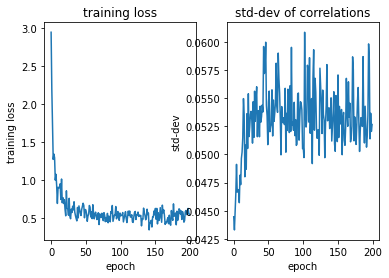

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text("training loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("training loss")
ax1.plot(np.array(x), np.array(y_loss))

ax2.title.set_text("std-dev of correlations")
ax2.set_xlabel("epoch")
ax2.set_ylabel("std-dev")
ax2.plot(np.array(x), np.array(y_score_std))

# three case prediction

In [6]:
datasets = load_data(['train'], config)
ds = datasets['train'].batch(1)

train dataset amount : 1


In [7]:
bordersize = 20
list_image_A = []
list_image_B = []
list_parameters = []
list_pred = []
for epoch in range(10):
    for image_A, image_B, parameters in ds.take(1):
        pred, score = model(image_A, image_B)
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
    pred = pred.numpy()
    list_image_A.append(image_A)
    list_image_B.append(image_B)
    list_parameters.append(parameters)
    list_pred.append(pred)

images_A = np.concatenate(list_image_A, axis=0)
images_B = np.concatenate(list_image_B, axis=0)
parameters = np.concatenate(list_parameters, axis=0)
pred = np.concatenate(list_pred, axis=0)
        
N,H,W = images_A.shape[0], images_A.shape[1], images_A.shape[2]
images_A = np.array(list(map(lambda image : visualize.makeBorder(image,bordersize) ,images_A)))
images_B = np.array(list(map(lambda image : visualize.makeBorder(image,bordersize) ,images_B)))

white_board = np.ones([N,64+2*bordersize,64+2*bordersize,3], np.float32)
motion_parameters = np.array(list(map(lambda image, parameter : visualize.draw_arrow(image,bordersize,parameter) 
                                     ,white_board, parameters)))
predictions = np.array(list(map(lambda image, parameter : visualize.draw_arrow(image,bordersize,parameter) 
                                     ,white_board, pred)))
images = np.stack([images_A, motion_parameters, images_B, predictions], axis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

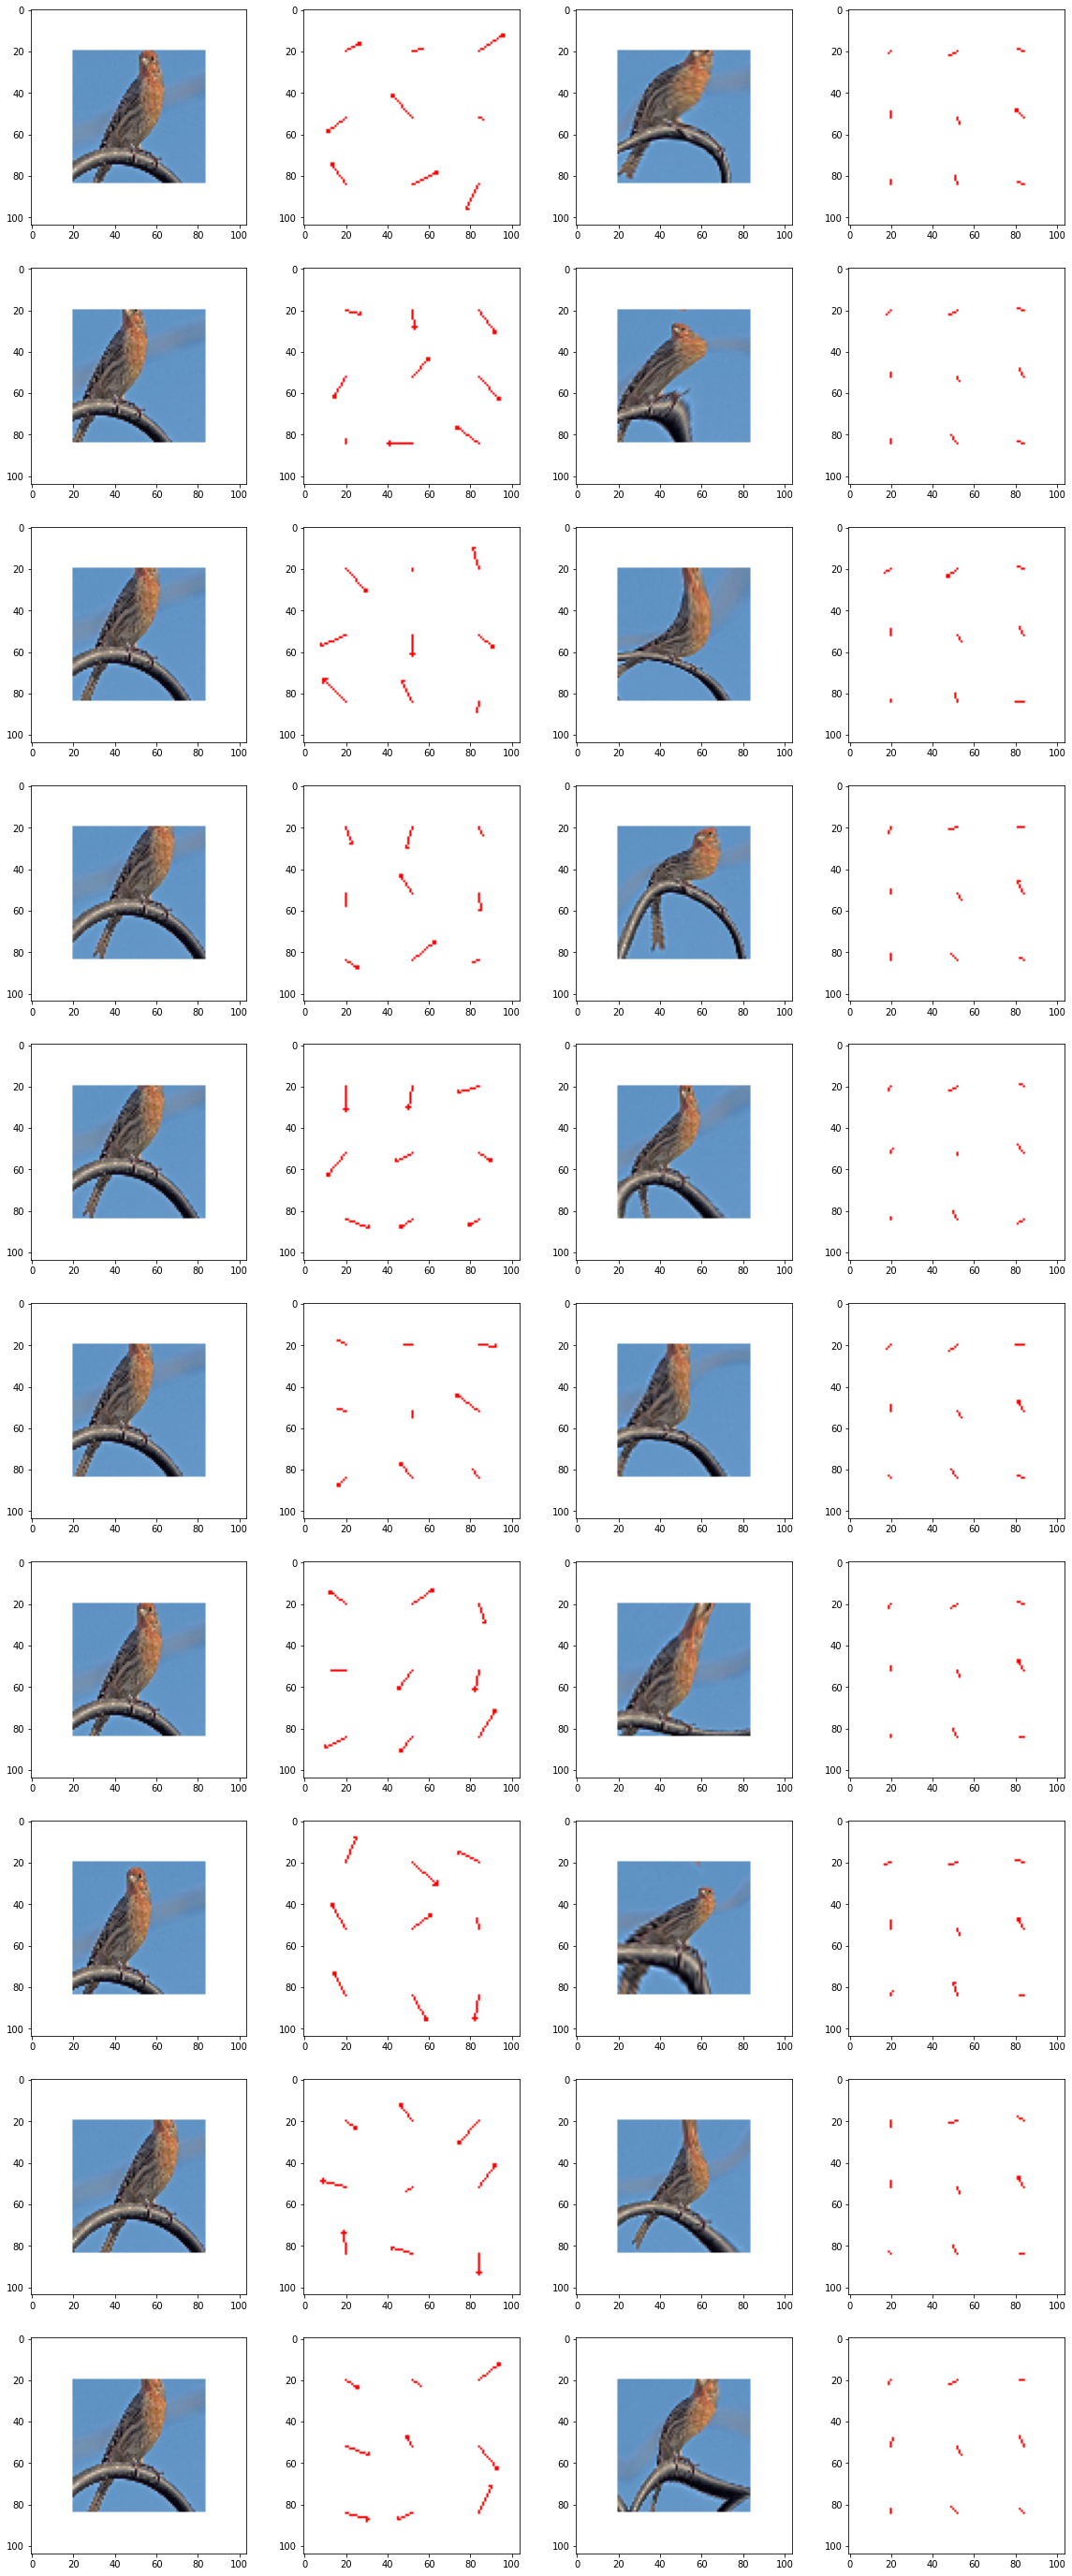

In [8]:
visualize.show_image(images)